# Our Processing Random Forest Model

![](hyperparam_intro_rf_only2.png)

# Load Libraries

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.utils import shuffle
 
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Loading data after preprosessing

In [13]:
import pandas as pd 
# Load in data
data = pd.read_csv('data_prepared.csv')
data.head()

DEPT_NBR  SUB_CL_NBR  CL_NBR  HOLIDAY  TYPE  FULFILLMENT_TYPE  \
0        66          43      40        1     0                 0   
1       927          67      60        1     0                 0   
2       229          45      40        1     0                 0   
3        74          35      30        0     0                 0   
4       224          47      40        1     0                 0   

   SKU_LNDD_UCST_AMT  GROSS_REVENUE  ZIPCODE_1  ZIPCODE_2  ZIPCODE_3  \
0           0.000840       0.000024          5          0          3   
1           0.001303       0.000040          9          4          0   
2           0.002904       0.000059          9          8          3   
3           0.001291       0.000045          4          3          2   
4           0.002687       0.000057          9          5          1   

   GROSS_QTY_SOLD  
0               1  
1               1  
2               1  
3               1  
4               1

Text(0.5, 0.98, 'Analyzin distirbutuion for the series')

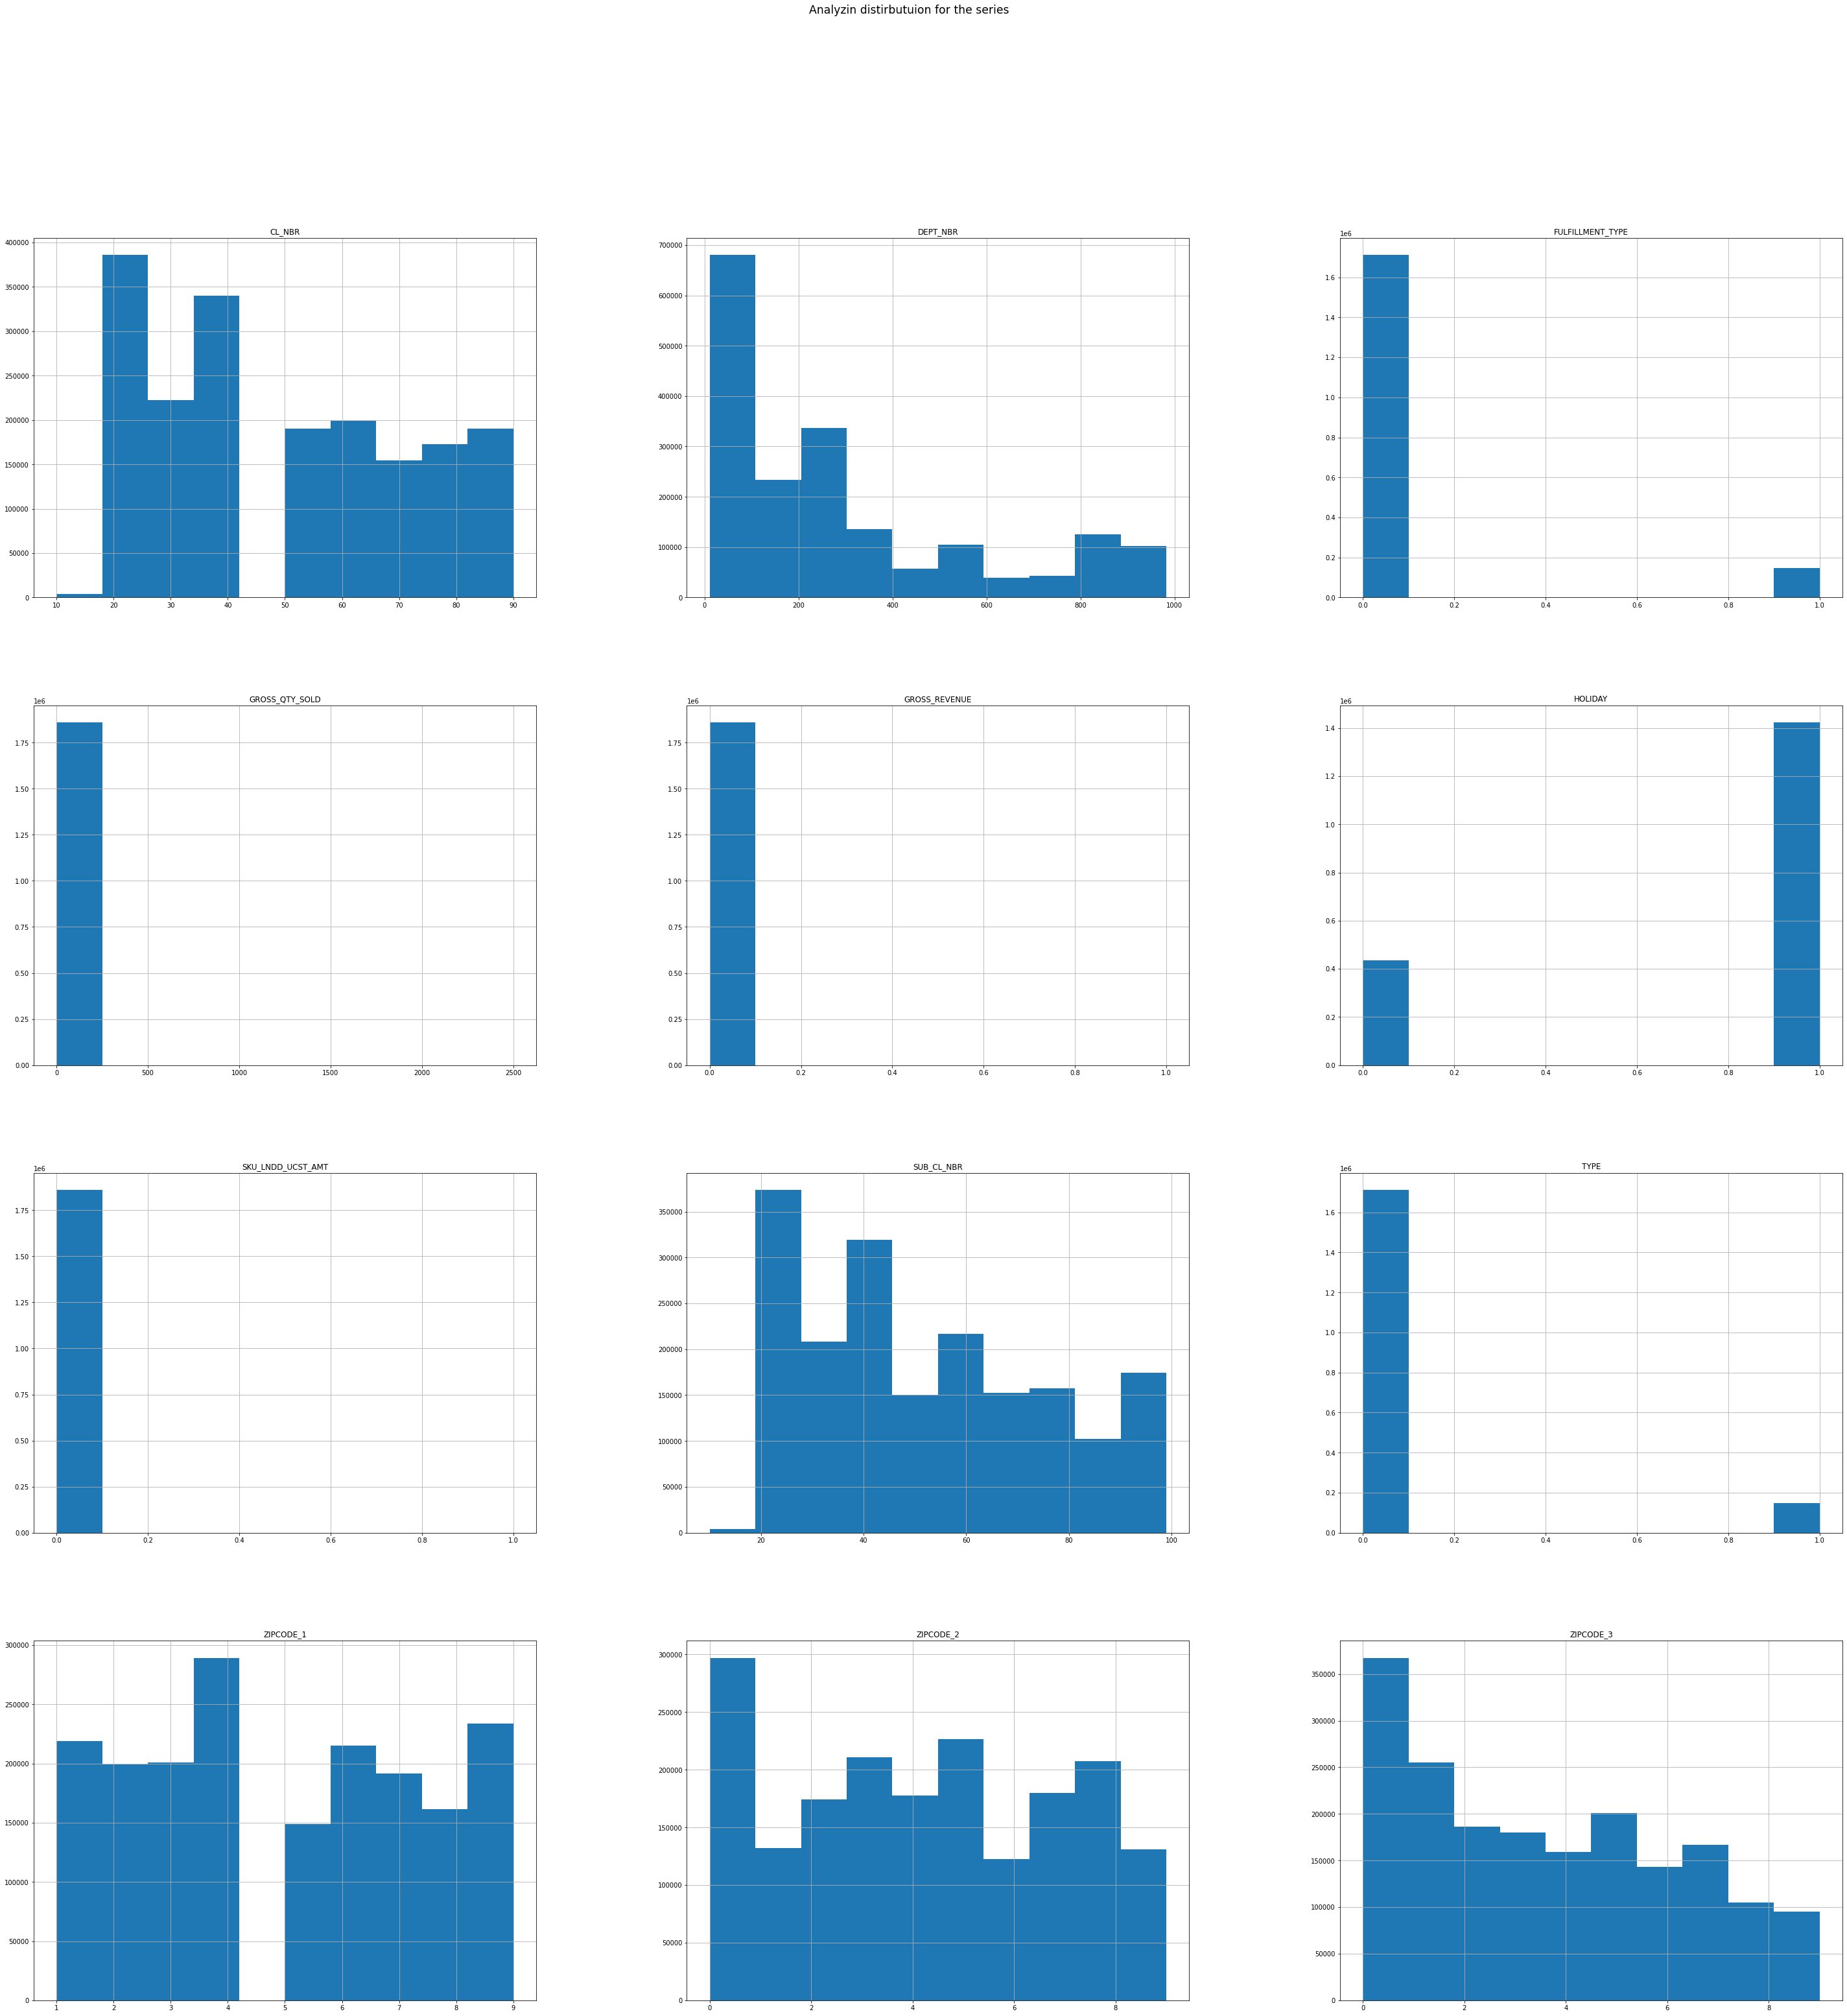

In [14]:
col = list(data)
import pylab
data.hist(
    column=col,
    figsize=(50, 50)
        )
pylab.suptitle("Analyzin distirbutuion for the series" , fontsize="xx-large")

# Find outlier for feature 'day'

In [15]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# def check_outlier_boxplot(col_name):
#     %matplotlib inline
#     sns.boxplot(x=data[col_name])
#     plt.show()
    
# def check_outlier_hist(col_name):
#     %matplotlib inline
#     plt.hist(data[col_name])
#     plt.show()

# def check_outlier_scatter(col_name):
#     fig, ax = plt.subplots(figsize=(16,8))
#     ax.scatter(data[col_name], data['GROSS_REVENUE'])
#     ax.set_xlabel(col_name)
#     ax.set_ylabel('GROSS_REVENUE')
#     plt.show()

## Visualize dataset

In [16]:
# ## visualize dataset
# data.plot(x='SKU_LNDD_UCST_AMT', y='GROSS_QTY_SOLD', style='o')  
# plt.title('SKU_LNDD_UCST_AMT vs GROSS_QTY_SOLD')  
# plt.xlabel('SKU_LNDD_UCST_AMT')  
# plt.ylabel('GROSS_QTY_SOLD')  
# plt.show()


# plt.figure(figsize=(15,10))
# plt.tight_layout()
# seabornInstance.distplot(data['GROSS_QTY_SOLD'])

In [17]:
from sklearn.utils import shuffle
data=shuffle(data)

# Labels are the values we want to predict

In [18]:
import numpy as np
target = np.array(data['GROSS_QTY_SOLD'])
# Remove the labels from the features
# axis 1 refers to the columns
features= data.drop('GROSS_QTY_SOLD', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

# Using Skicit-learn to split data into training and testing sets
## Split the data into training and testing sets

In [19]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, 
                                                                            target, test_size = 0.25, 
                                                                            random_state = 42)

In [20]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1394214, 11)
Training Labels Shape: (1394214,)
Testing Features Shape: (464738, 11)
Testing Labels Shape: (464738,)


# Radom Forest Model

In [21]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees + # Train the model on training data
rand_forest_model = RandomForestRegressor(n_estimators = 120, max_features='sqrt',
                                          random_state = 42 , n_jobs=10).fit(train_features, train_labels)

# Evaluate our model with 10 Cross Validation 

In [22]:
# from sklearn.model_selection import cross_val_score
# predicted_cv = cross_val_score(rand_forest_model, train_features, train_labels, cv=10 )

# np.mean(predicted_cv)

# Use the forest's predict method on the test data

In [23]:
predictions = rand_forest_model.predict(test_features)
predictions

array([1.        , 1.98940664, 0.02020603, ..., 1.05891936, 1.075     ,
       0.99702534])

In [24]:
df = pd.DataFrame({'Actual': test_labels.flatten(), 'Predicted': predictions.flatten()})
df.head(25)

Actual  Predicted
0        1   1.000000
1        2   1.989407
2        0   0.020206
3        1   1.033333
4        1   1.806719
5        1   0.998488
6        1   0.998488
7        2   2.335635
8        1   0.996294
9        2   2.036032
10       1   0.998488
11       1   1.000000
12       1   0.996801
13       1   1.008333
14       1   0.997406
15       1   0.997810
16       0   0.058851
17       1   1.000000
18       1   0.999252
19       1   0.996621
20       1   1.000000
21       1   1.022740
22       1   1.001206
23       4   2.607585
24       0   0.023525

# Visualization Actual and Predicted value

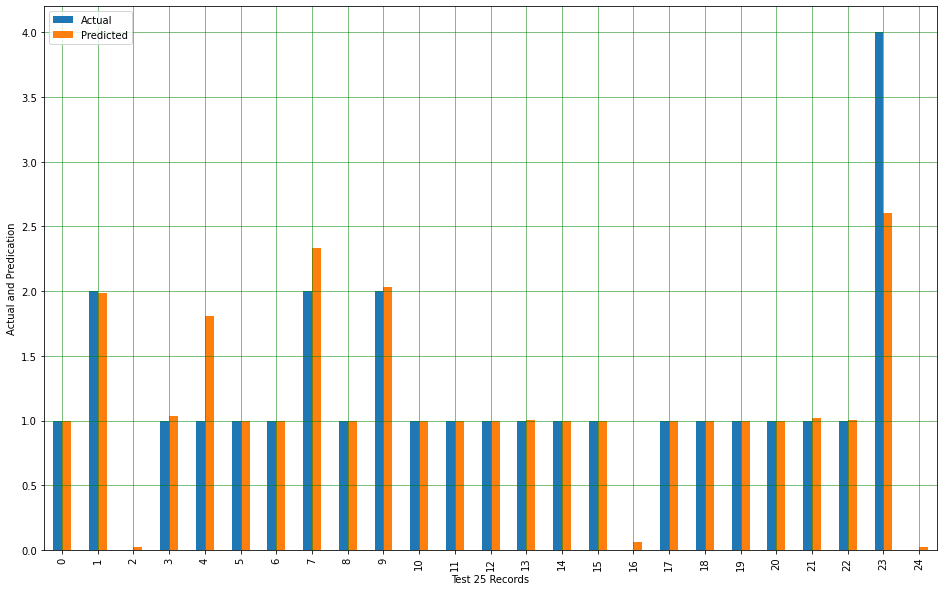

In [25]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Test 25 Records')
plt.ylabel('Actual and Predication')
plt.show()

# Test data metrics

In [26]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
#Test data
print('Mean Absolute Error:', metrics.mean_absolute_error(predictions, test_labels))
print('Mean Squared Error:', metrics.mean_squared_error(predictions, test_labels))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(predictions, test_labels)))
print('R-Squared:', metrics.r2_score(predictions, test_labels))

Mean Absolute Error: 0.16620099630022983
Mean Squared Error: 0.5550578187536921
Root Mean Squared Error: 0.7450220256835982
R-Squared: 0.9231078334449864


# Variable Importances


In [29]:
# Get numerical feature importances
importances = list(rand_forest_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];



Variable: GROSS_REVENUE        Importance: 0.77
Variable: SKU_LNDD_UCST_AMT    Importance: 0.07
Variable: DEPT_NBR             Importance: 0.05
Variable: SUB_CL_NBR           Importance: 0.03
Variable: ZIPCODE_1            Importance: 0.02
Variable: ZIPCODE_2            Importance: 0.02
Variable: ZIPCODE_3            Importance: 0.02
Variable: CL_NBR               Importance: 0.01
Variable: HOLIDAY              Importance: 0.01
Variable: TYPE                 Importance: 0.0
Variable: FULFILLMENT_TYPE     Importance: 0.0


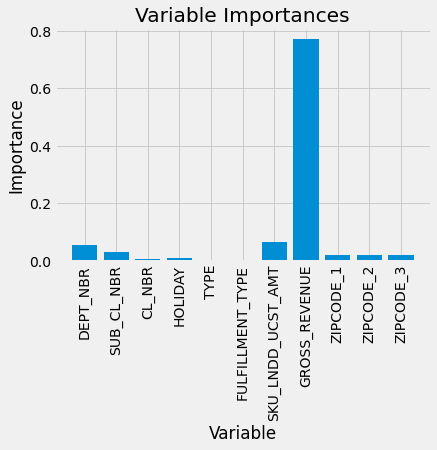

In [30]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');